In [2]:
import pandas as pd
#
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)
#pd.set_option("display.width", None)
#pd.set_option("display.max_colwidth", None)

DEMO_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/DEMO_L.xpt", format="xport")
DIQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/DIQ_L.xpt", format="xport")
GHB_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/GHB_L.xpt", format="xport")
GLU_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/GLU_L.xpt", format="xport")
HIQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/HIQ_L.xpt", format="xport")
HUQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/HUQ_L.xpt", format="xport")
INQ_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/INQ_L.xpt", format="xport")
UCPREG_21_23 = pd.read_sas("/Users/unnatiagarwal/Documents/Semester_4/2021-2023/UCPREG_L.xpt", format="xport")




In [3]:
df = DEMO_21_23
df = df.merge(DIQ_21_23, on="SEQN", how="left")
df = df.merge(GHB_21_23, on="SEQN", how="left")
df = df.merge(GLU_21_23, on="SEQN", how="left")
df = df.merge(HIQ_21_23, on="SEQN", how="left")
df = df.merge(HUQ_21_23, on="SEQN", how="left")
df = df.merge(INQ_21_23, on="SEQN", how="left")
df = df.merge(UCPREG_21_23, on="SEQN", how="left")

df.shape

(11933, 60)

In [4]:
df.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'RIDEXAGM',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDYRUSR',
 'DMDEDUC2',
 'DMDMARTZ',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVSTRA',
 'SDMVPSU',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ160',
 'DIQ180',
 'DIQ050',
 'DID060',
 'DIQ060U',
 'DIQ070',
 'WTPH2YR',
 'LBXGH',
 'WTSAF2YR',
 'LBXGLU',
 'LBDGLUSI',
 'HIQ011',
 'HIQ032A',
 'HIQ032B',
 'HIQ032C',
 'HIQ032D',
 'HIQ032E',
 'HIQ032F',
 'HIQ032H',
 'HIQ032I',
 'HIQ210',
 'HUQ010',
 'HUQ030',
 'HUQ042',
 'HUQ055',
 'HUQ090',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'URXPREG']

In [5]:
#df["bio_diabetes"] = df["LBXGH"].notna() & df["LBXGH"].ge(6.5)
#df["bio_diabetes"].value_counts()

#LBXGH = HbA1c level 

In [6]:
#df["LBXGH"].value_counts(dropna=False).sort_index(ascending=True)
#df = df[df["RIDAGEYR"] >= 20]

#df["bio_diabetes"].value_counts()
#(df["bio_diabetes"] == True).sum()

## Data cleaning (continued)

Below: remove duplicates, handle missing values, and recode NHANES "Refused" / "Don't know" where appropriate.

In [7]:
# 1. Duplicate check (SEQN should be unique per respondent)
n_before = len(df)
dup_mask = df.duplicated(subset=["SEQN"], keep="first")
n_dups = dup_mask.sum()
if n_dups > 0:
    df = df[~dup_mask]
    print(f"Dropped {n_dups} duplicate SEQN. Rows: {n_before} -> {len(df)}")
else:
    print("No duplicate SEQN found.")

No duplicate SEQN found.


In [8]:
df.columns.to_list()

['SEQN',
 'SDDSRVYR',
 'RIDSTATR',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'RIDEXMON',
 'RIDEXAGM',
 'DMQMILIZ',
 'DMDBORN4',
 'DMDYRUSR',
 'DMDEDUC2',
 'DMDMARTZ',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDHRGND',
 'DMDHRAGZ',
 'DMDHREDZ',
 'DMDHRMAZ',
 'DMDHSEDZ',
 'WTINT2YR',
 'WTMEC2YR',
 'SDMVSTRA',
 'SDMVPSU',
 'INDFMPIR',
 'DIQ010',
 'DID040',
 'DIQ160',
 'DIQ180',
 'DIQ050',
 'DID060',
 'DIQ060U',
 'DIQ070',
 'WTPH2YR',
 'LBXGH',
 'WTSAF2YR',
 'LBXGLU',
 'LBDGLUSI',
 'HIQ011',
 'HIQ032A',
 'HIQ032B',
 'HIQ032C',
 'HIQ032D',
 'HIQ032E',
 'HIQ032F',
 'HIQ032H',
 'HIQ032I',
 'HIQ210',
 'HUQ010',
 'HUQ030',
 'HUQ042',
 'HUQ055',
 'HUQ090',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'URXPREG']

In [9]:
# 2. Missing value summary and drop high-missing columns
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing_agg = pd.DataFrame({"count": missing_count, "pct": missing_pct}).sort_values("count", ascending=False)
missing_agg = missing_agg[missing_agg["count"] > 0]

print("Columns with missing values (after filters):")
print(missing_agg.to_string())
print()

# Drop columns with more than 50% missing (optional; adjust threshold as needed)
THRESHOLD_PCT = 50
cols_to_drop = missing_agg[missing_agg["pct"] > THRESHOLD_PCT].index.tolist()
if cols_to_drop:
    df = df.drop(columns=cols_to_drop, errors="ignore")
    print(f"Dropped {len(cols_to_drop)} columns with >{THRESHOLD_PCT}% missing: {cols_to_drop}")
else:
    print(f"No columns with >{THRESHOLD_PCT}% missing.")
print(f"Shape after dropping high-missing columns: {df.shape}")

Columns with missing values (after filters):
          count        pct
HIQ032E   11839  99.212268
HIQ032C   11732  98.315595
DIQ060U   11601  97.217799
DID060    11590  97.125618
HIQ032F   11563  96.899355
RIDAGEMN  11556  96.840694
HIQ032I   11482  96.220565
DIQ050    10852  90.941088
DID040    10852  90.941088
HIQ032H   10813  90.614263
URXPREG   10803  90.530462
RIDEXPRG  10430  87.404676
DMDYRUSR  10058  84.287271
DMDHSEDZ   9806  82.175480
DIQ070     9652  80.884941
HIQ032D    9368  78.504986
HIQ032B    9157  76.736780
RIDEXAGM   9146  76.644599
LBDGLUSI   8261  69.228191
LBXGLU     8261  69.228191
DMDHREDZ   8187  68.608062
WTSAF2YR   7937  66.513031
DMDHRMAZ   7913  66.311908
DMDHRGND   7818  65.515797
DMDHRAGZ   7809  65.440375
IND310     6283  52.652309
HIQ032A    5986  50.163412
LBXGH      5218  43.727478
WTPH2YR    4734  39.671499
DMDMARTZ   4141  34.702087
DMDEDUC2   4139  34.685326
DIQ160     3911  32.774659
DMQMILIZ   3632  30.436604
DIQ180     3629  30.411464
RIDEXMON  

In [10]:
df['LBXGH'].value_counts()

LBXGH
5.4     628
5.3     602
5.5     596
5.6     573
5.2     571
       ... 
3.8       1
14.3      1
12.5      1
9.0       1
3.7       1
Name: count, Length: 101, dtype: int64

In [11]:
# 3. NHANES "Refused" (7) and "Don't know" (9) → NaN for survey items only
# Only in questionnaire vars (DIQ, HIQ, HUQ, INQ); do not touch age, lab values, etc.
nhanes_special = [7, 9]
survey_prefixes = ("DIQ", "HIQ", "HUQ", "INQ")
cols_survey = [c for c in df.columns if c.startswith(survey_prefixes)]
for col in cols_survey:
    if df[col].isin(nhanes_special).any():
        n_replaced = df[col].isin(nhanes_special).sum()
        df[col] = df[col].replace(nhanes_special, float("nan"))
        if n_replaced > 0:
            print(f"  {col}: {n_replaced} values 7/9 -> NaN")
print("Done recoding Refused/Don't know to NaN for survey variables.")

  DIQ010: 4 values 7/9 -> NaN
  DIQ160: 15 values 7/9 -> NaN
  DIQ180: 267 values 7/9 -> NaN
  HIQ011: 39 values 7/9 -> NaN
  HIQ210: 21 values 7/9 -> NaN
  HUQ010: 7 values 7/9 -> NaN
  HUQ030: 10 values 7/9 -> NaN
  HUQ055: 24 values 7/9 -> NaN
  HUQ090: 27 values 7/9 -> NaN
  INQ300: 394 values 7/9 -> NaN
Done recoding Refused/Don't know to NaN for survey variables.


In [12]:
# 3b. NHANES "Don't know" (99) and "Refused" (999) → NaN (survey & demographic only; not age)
nhanes_99_999 = [99, 999]
# Survey + demographic prefixes; do not touch RIDAGEYR, lab values, or SEQN
recode_prefixes = ("DIQ", "HIQ", "HUQ", "INQ", "DMD", "DMQ")
cols_recode = [c for c in df.columns if c.startswith(recode_prefixes)]
for col in cols_recode:
    if df[col].isin(nhanes_99_999).any():
        n_replaced = df[col].isin(nhanes_99_999).sum()
        df[col] = df[col].replace(nhanes_99_999, float("nan"))
        if n_replaced > 0:
            print(f"  {col}: {n_replaced} values 99/999 -> NaN")
print("Done recoding 99/999 to NaN.")

# 3c. Replace near-zero / below-detection lab values (e.g. 5.4e-79) with NaN
lab_prefixes = ("LBX", "LBD")
cols_lab = [c for c in df.columns if c.startswith(lab_prefixes)]
for col in cols_lab:
    if df[col].dtype in ("float64", "float32"):
        below_lod = (df[col] > 0) & (df[col] < 1e-10)
        n_replaced = below_lod.sum()
        if n_replaced > 0:
            df.loc[below_lod, col] = float("nan")
            print(f"  {col}: {n_replaced} near-zero values -> NaN")
print("Done replacing near-zero lab values.")

  DMDMARTZ: 5 values 99/999 -> NaN
  HUQ042: 6 values 99/999 -> NaN
Done recoding 99/999 to NaN.
Done replacing near-zero lab values.


In [13]:
# 4. Final missing-value summary (after all cleaning)
still_missing = df.isnull().sum()
still_missing = still_missing[still_missing > 0].sort_values(ascending=False)
if len(still_missing) > 0:
    print("Remaining columns with missing values:")
    print((still_missing / len(df) * 100).round(1).to_string())
else:
    print("No missing values remaining.")
print(f"\nFinal cleaned shape: {df.shape}")
df.info()

Remaining columns with missing values:
LBXGH       43.7
WTPH2YR     39.7
DMDMARTZ    34.7
DMDEDUC2    34.7
DIQ160      32.9
DIQ180      32.6
DMQMILIZ    30.4
RIDEXMON    25.8
INDFMMPI    24.7
INDFMPIR    17.1
INQ300      15.6
INDFMMPC    12.3
HUQ042      10.4
HIQ210       8.0
HUQ090       6.6
DIQ010       1.7
HIQ011       0.5
HUQ055       0.2
DMDBORN4     0.2
HUQ030       0.1
HUQ010       0.1

Final cleaned shape: (11933, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11933 non-null  float64
 1   SDDSRVYR  11933 non-null  float64
 2   RIDSTATR  11933 non-null  float64
 3   RIAGENDR  11933 non-null  float64
 4   RIDAGEYR  11933 non-null  float64
 5   RIDRETH1  11933 non-null  float64
 6   RIDRETH3  11933 non-null  float64
 7   RIDEXMON  8860 non-null   float64
 8   DMQMILIZ  8301 non-null   float64
 9   DMDBORN4  11914 non-null  f

In [14]:
# 5. (Optional) Save cleaned dataframe to CSV for downstream use
df.to_csv("Cleaning_data_cleaned.csv", index=False)
print("Saved cleaned data to Cleaning_data_cleaned.csv")

Saved cleaned data to Cleaning_data_cleaned.csv


## Columns most related to LBXGH (HbA1c)

**LBXGH** = Glycated hemoglobin (HbA1c), a key diabetes biomarker. Below we rank numeric columns by strength of linear (Pearson) and monotonic (Spearman) correlation with LBXGH. Pairwise complete observations are used for each correlation.

In [15]:
# Relevance of each column w.r.t. LBXGH: Pearson & Spearman correlation
target = "LBXGH"
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
# Exclude target itself and ID/design vars that are not meaningful for association
exclude = {target, "SEQN"}
candidates = [c for c in numeric_cols if c not in exclude]

corrs = []
for col in candidates:
    valid = df[[target, col]].dropna(how="any")
    n = len(valid)
    if n < 30:  # skip if too few pairs
        continue
    r_pearson = valid[target].corr(valid[col], method="pearson")
    r_spearman = valid[target].corr(valid[col], method="spearman")
    corrs.append({
        "column": col,
        "n": n,
        "pearson": r_pearson,
        "spearman": r_spearman,
        "abs_pearson": abs(r_pearson),
        "abs_spearman": abs(r_spearman),
    })

corr_df = pd.DataFrame(corrs)
corr_df = corr_df.sort_values("abs_pearson", ascending=False).reset_index(drop=True)
corr_df = corr_df.round(4)
print("Top columns most related to LBXGH (by |Pearson|):")
display(corr_df[["column", "n", "pearson", "spearman", "abs_pearson"]].head(25))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top columns most related to LBXGH (by |Pearson|):


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


,column,n,pearson,spearman,abs_pearson
0,DIQ010,6714,-0.5016,-0.3745,0.5016
1,RIDAGEYR,6715,0.2984,0.4726,0.2984
2,HUQ010,6713,0.2700,0.2643,0.2700
3,DIQ160,5655,-0.2547,-0.2851,0.2547
4,DMDEDUC2,5767,-0.2012,-0.2184,0.2012
5,DIQ180,5694,-0.1631,-0.2119,0.1631
6,INDFMPIR,5873,-0.0971,-0.0874,0.0971
7,DMDHHSIZ,6715,-0.0956,-0.1640,0.0956
8,INQ300,5981,0.0941,0.0620,0.0941
9,INDFMMPI,5392,-0.0808,-0.0655,0.0808


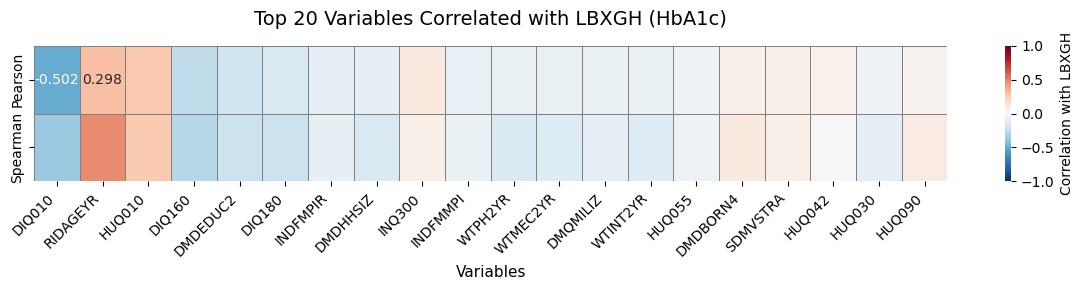


Heatmap shows Pearson (linear) and Spearman (monotonic) correlations.
Red = positive correlation, Blue = negative correlation with LBXGH.


In [16]:
# Visualize correlations with LBXGH as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for heatmap: top N variables
top_n = 20
top_corr = corr_df.head(top_n).copy()

# Create a matrix with Pearson and Spearman side by side
heatmap_data = top_corr[["pearson", "spearman"]].T
heatmap_data.columns = top_corr["column"].values

# Create figure
fig, ax = plt.subplots(figsize=(12, 3))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Correlation with LBXGH"},
    yticklabels=["Pearson", "Spearman"],
    ax=ax,
    linewidths=0.5,
    linecolor="gray"
)
ax.set_title(f"Top {top_n} Variables Correlated with LBXGH (HbA1c)", fontsize=14, pad=15)
ax.set_xlabel("Variables", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(f"\nHeatmap shows Pearson (linear) and Spearman (monotonic) correlations.")
print(f"Red = positive correlation, Blue = negative correlation with LBXGH.")

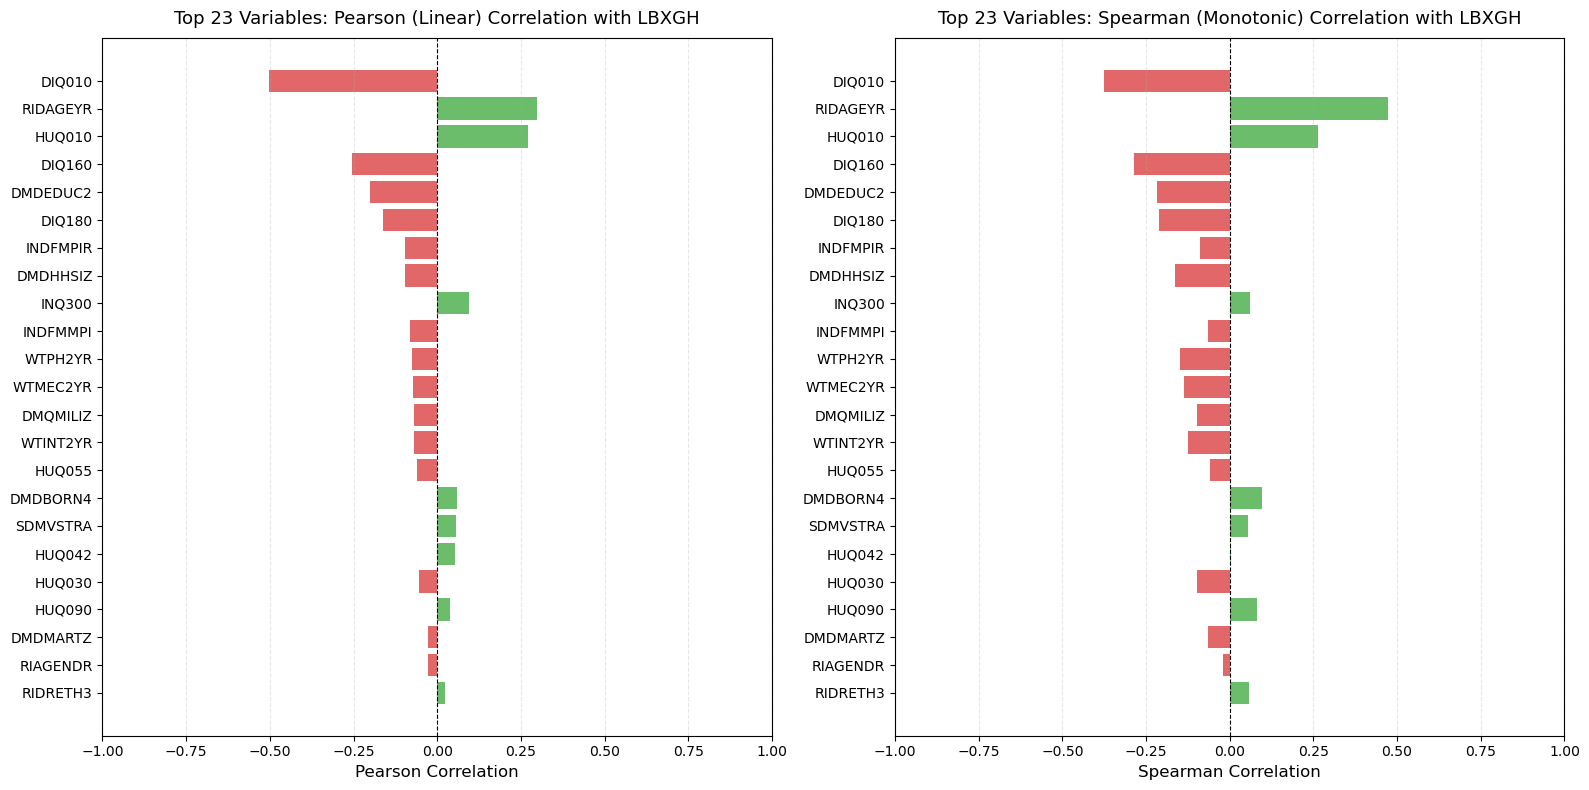

Red bars = Negative correlation, Green bars = Positive correlation


In [17]:
# Alternative: Bar chart visualization of correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top N for visualization
top_n = 23
top_corr_viz = corr_df.head(top_n).copy()

# Sort by absolute Pearson for consistent ordering
top_corr_viz = top_corr_viz.sort_values("abs_pearson", ascending=True)

# Bar chart for Pearson correlation
colors_pearson = ["#2ca02c" if x > 0 else "#d62728" for x in top_corr_viz["pearson"]]
ax1.barh(top_corr_viz["column"], top_corr_viz["pearson"], color=colors_pearson, alpha=0.7)
ax1.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
ax1.set_xlabel("Pearson Correlation", fontsize=12)
ax1.set_title(f"Top {top_n} Variables: Pearson (Linear) Correlation with LBXGH", fontsize=13, pad=10)
ax1.grid(axis="x", alpha=0.3, linestyle="--")
ax1.set_xlim(-1, 1)

# Bar chart for Spearman correlation
colors_spearman = ["#2ca02c" if x > 0 else "#d62728" for x in top_corr_viz["spearman"]]
ax2.barh(top_corr_viz["column"], top_corr_viz["spearman"], color=colors_spearman, alpha=0.7)
ax2.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
ax2.set_xlabel("Spearman Correlation", fontsize=12)
ax2.set_title(f"Top {top_n} Variables: Spearman (Monotonic) Correlation with LBXGH", fontsize=13, pad=10)
ax2.grid(axis="x", alpha=0.3, linestyle="--")
ax2.set_xlim(-1, 1)

plt.tight_layout()
plt.show()

print("Red bars = Negative correlation, Green bars = Positive correlation")

In [18]:
# Brief interpretation: variable meanings (NHANES)
# Top correlates of LBXGH (HbA1c) are typically:
# - LBXGLU / LBDGLUSI: fasting glucose (same lab, different units) — strong positive correlation expected
# - DIQ010: Doctor told you have diabetes (1=Yes, 2=No, 3=Borderline) — strong association
# - RIDAGEYR: Age — often positive (HbA1c tends to rise with age)
# - INDFMPIR: Income-to-poverty ratio — often negative (lower income ↔ higher diabetes risk)
# - DMDEDUC2, DMDMARTZ: Education, marital status — demographic/social determinants
# - DIQ160, DIQ180: Diabetes-related questionnaire items
# - HIQ011, HIQ210: Health insurance
# Variables with |pearson| > 0.3 are usually the most relevant for modeling or stratification.
top_relevant = corr_df.head(15)["column"].tolist()
print("Most relevant columns for LBXGH (use in models or stratification):", top_relevant)

Most relevant columns for LBXGH (use in models or stratification): ['DIQ010', 'RIDAGEYR', 'HUQ010', 'DIQ160', 'DMDEDUC2', 'DIQ180', 'INDFMPIR', 'DMDHHSIZ', 'INQ300', 'INDFMMPI', 'WTPH2YR', 'WTMEC2YR', 'DMQMILIZ', 'WTINT2YR', 'HUQ055']
